In [49]:
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import os
from folium.plugins import HeatMap

In [5]:
files = os.listdir(r'C:\Users\JesusSanchez\DataspellProjects\Data-Science---Projects\Exploratory_Data_Analysis\Uber_Data_Analysis\uber-pickups-in-new-york-city')
files

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
# Analysis with journeys in 2014
files = files[-7:]
files.remove('uber-raw-data-janjune-15.csv')
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [7]:
# Concat in one dataframe
path = r'C:\Users\JesusSanchez\DataspellProjects\Data-Science---Projects\Exploratory_Data_Analysis\Uber_Data_Analysis\uber-pickups-in-new-york-city'
final_df = pd.DataFrame()
for file in files:
    df = pd.read_csv(path+'/'+file, encoding='utf-8')
    final_df = pd.concat([final_df, df])

In [8]:
final_df.shape

(4534327, 4)

In [9]:
# Data preprocessing
df = final_df.copy()
df.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [10]:
# Check type of data
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [11]:
# Convert date/time object to timestamp
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = '%m/%d/%Y %H:%M:%S')
print(df.head())
df.dtypes

            Date/Time      Lat      Lon    Base
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512


Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [12]:
# More detail data
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['month'] = df['Date/Time'].dt.month
df['hour'] = df['Date/Time'].dt.hour
df.head()

Date/Time      Lat      Lon    Base  weekday  day  minute  month  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512  Tuesday    1      11      4   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512  Tuesday    1      17      4   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512  Tuesday    1      21      4   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512  Tuesday    1      28      4   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512  Tuesday    1      33      4   

   hour  
0     0  
1     0  
2     0  
3     0  
4     0

In [21]:
# Journeys per weekday
df['weekday'] = df['weekday'].apply(str)
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

Text(0.5, 1.0, 'Trips per weekdays')

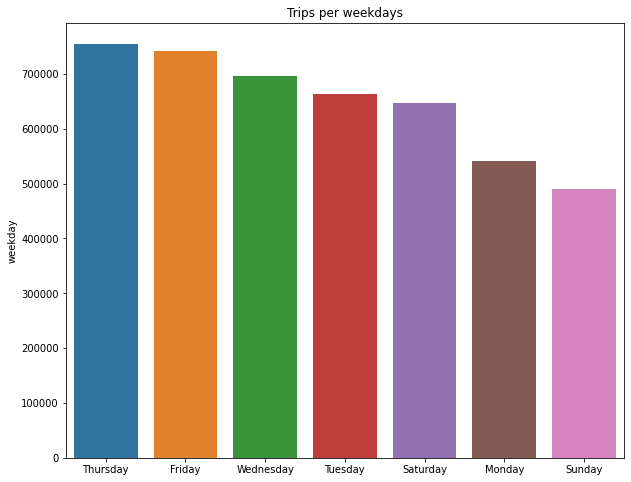

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['weekday'].value_counts().index, y=df['weekday'].value_counts())
plt.title('Trips per weekdays')

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

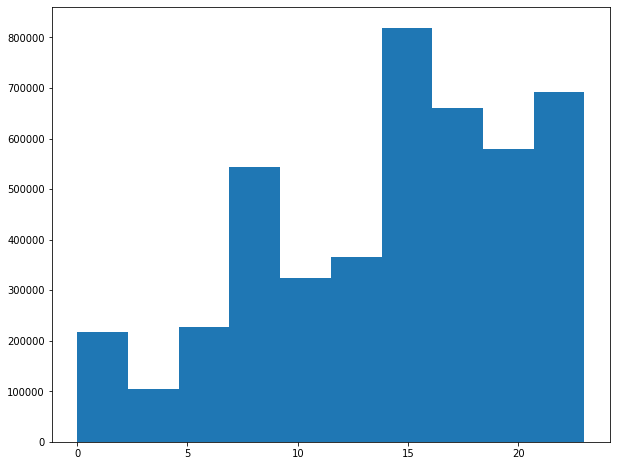

In [18]:
# Frequency of trips per hour
plt.figure(figsize=(10, 8))
plt.hist(df['hour'])

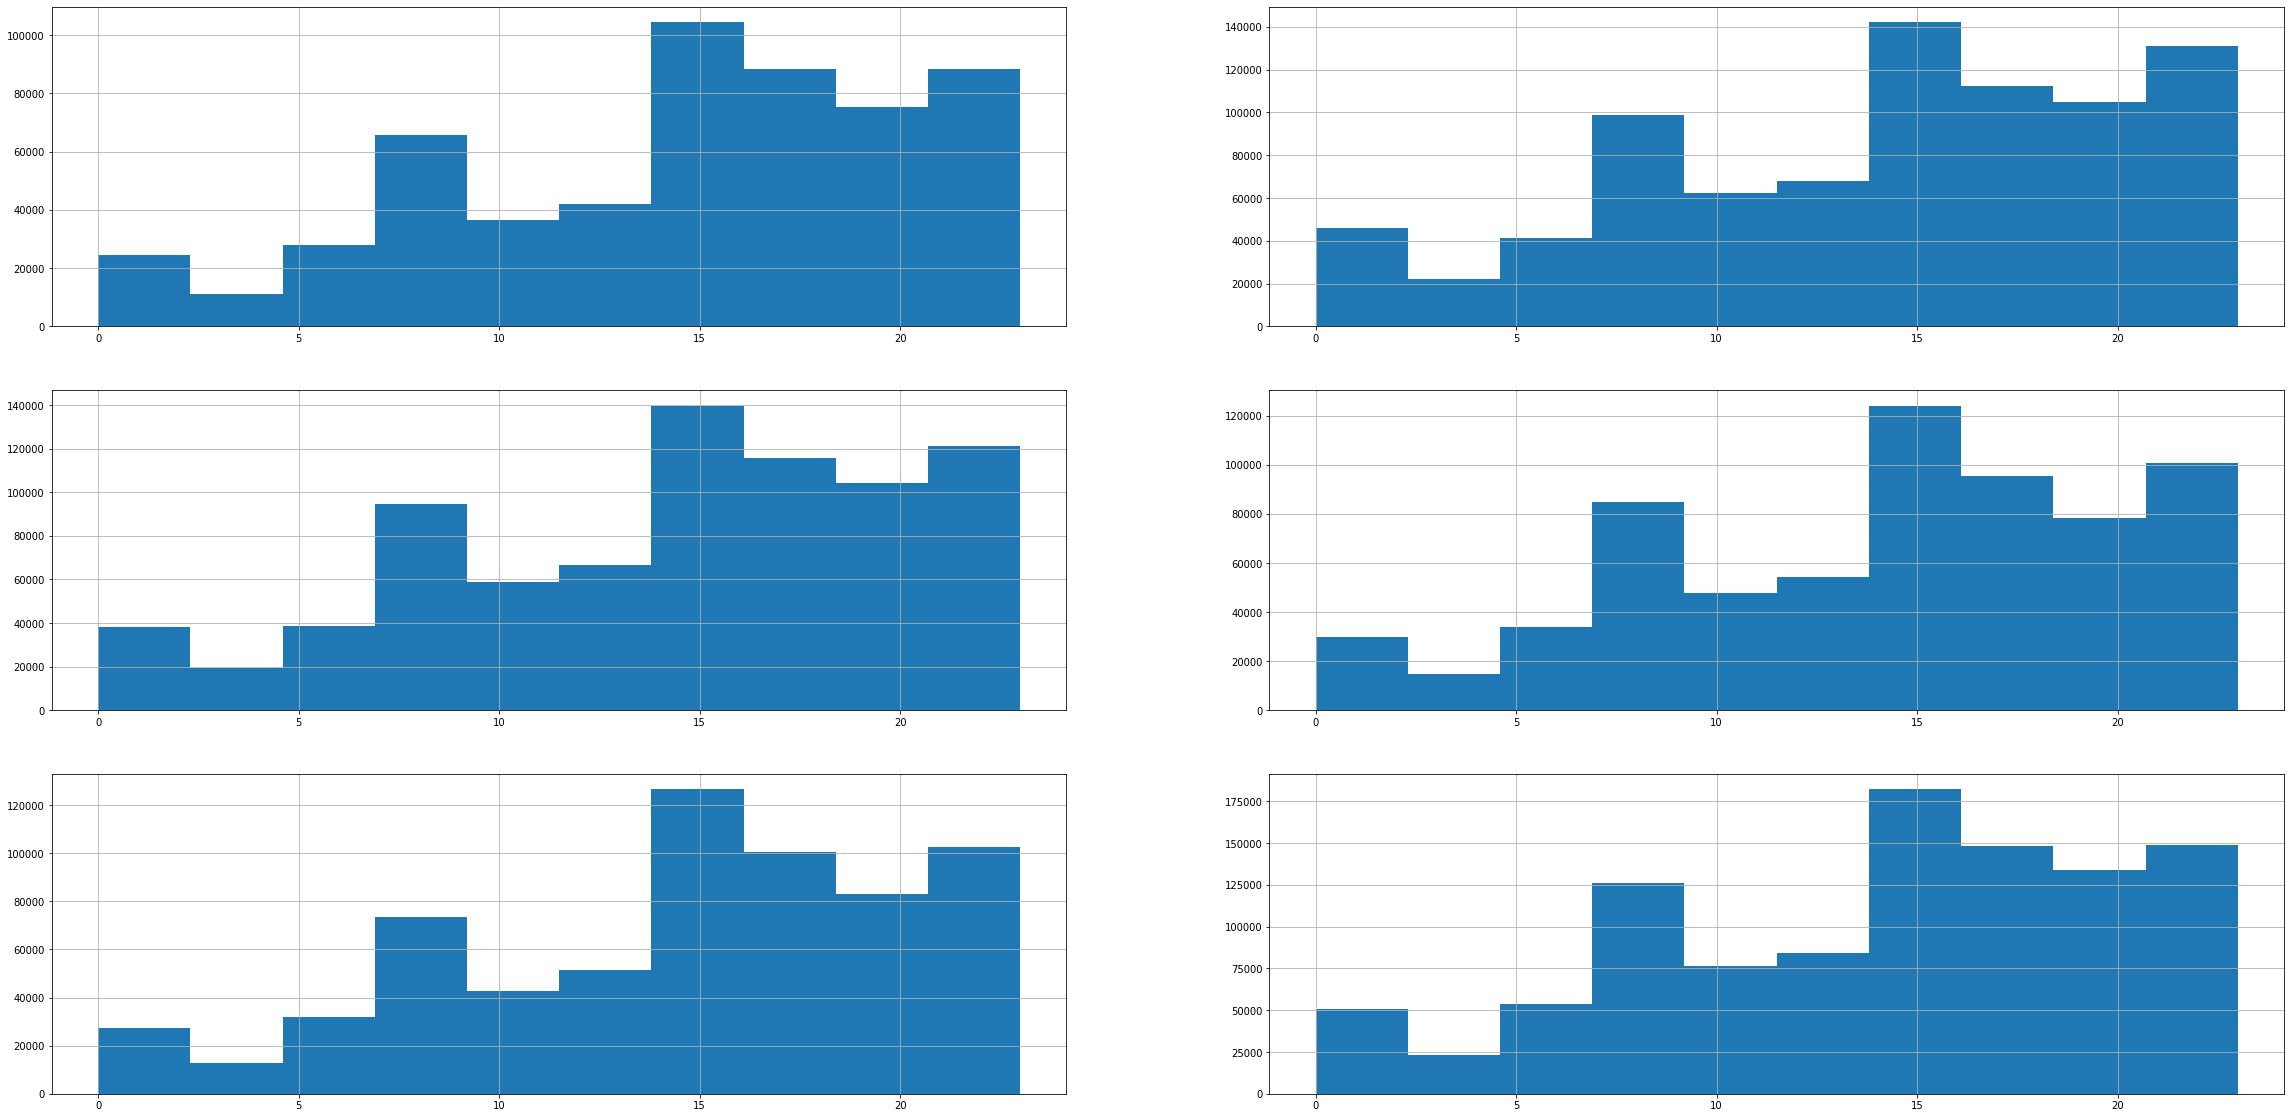

In [22]:
plt.figure(figsize=(40, 20))
for i, month in enumerate(df['month'].unique()):
    plt.subplot(3, 2, i+1) # Graphic position
    df[df['month'] == month]['hour'].hist() # Histogram graphic

In [23]:
# Duration for trip in each month
df.groupby('month')['hour'].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hour, dtype: int64

Text(0.5, 1.0, 'Number of hours in rides per month')

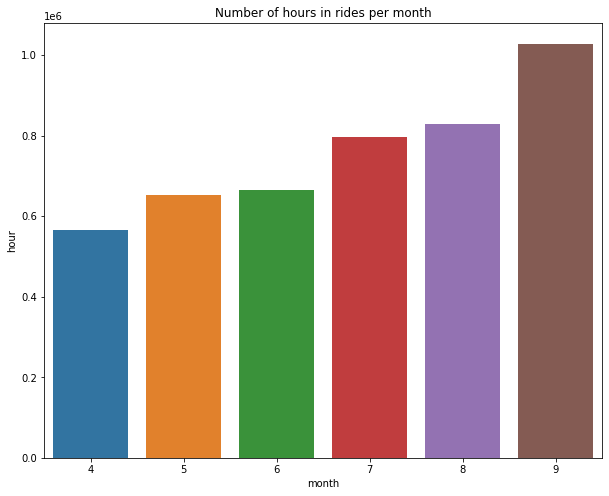

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df.groupby('month')['hour'].count().index, y=df.groupby('month')['hour'].count())
plt.title('Number of hours in rides per month')

Text(0.5, 1.0, 'Journeys by month day')

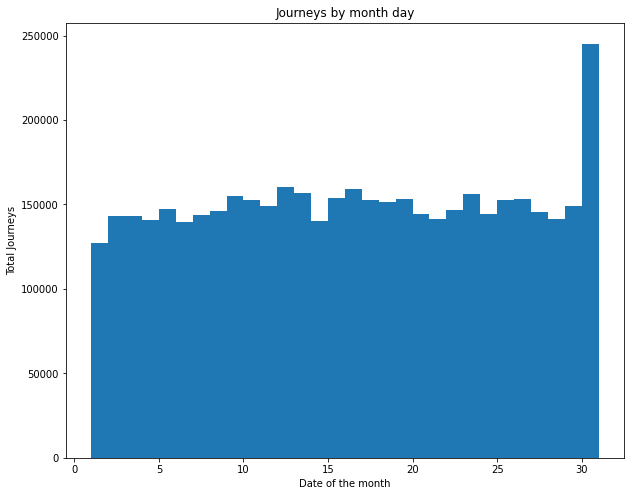

In [25]:
# Journeys per day
plt.figure(figsize=(10, 8))
plt.hist(df['day'], bins = 30)
plt.xlabel('Date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by month day')

Text(0.5, 1.0, 'Journeys by month day')

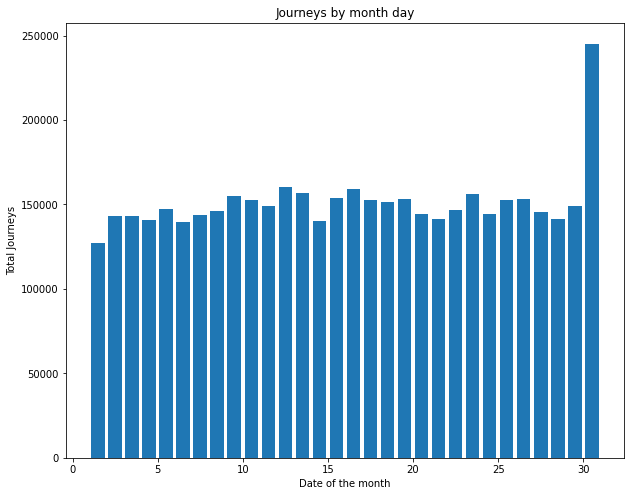

In [26]:
# Treatment of the graph
plt.figure(figsize=(10, 8))
plt.hist(df['day'], bins = 30, rwidth=(0.8))
plt.xlabel('Date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by month day')

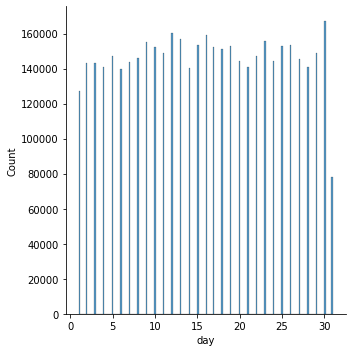

In [27]:
sns.displot(df['day'])

Text(0.5, 1.0, 'Journeys by month day')

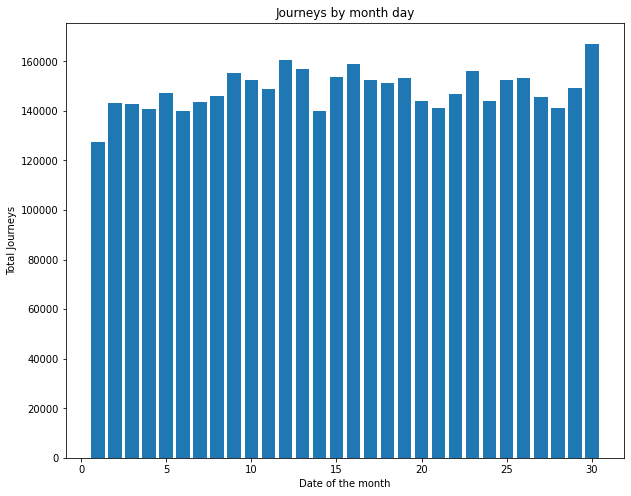

In [29]:
plt.figure(figsize=(10, 8))
plt.hist(df['day'], bins = 30, rwidth=(0.8), range=(0.5, 30.5))
plt.xlabel('Date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by month day')

### Here, we can see that 30 days is not the day with more journeys with that difference

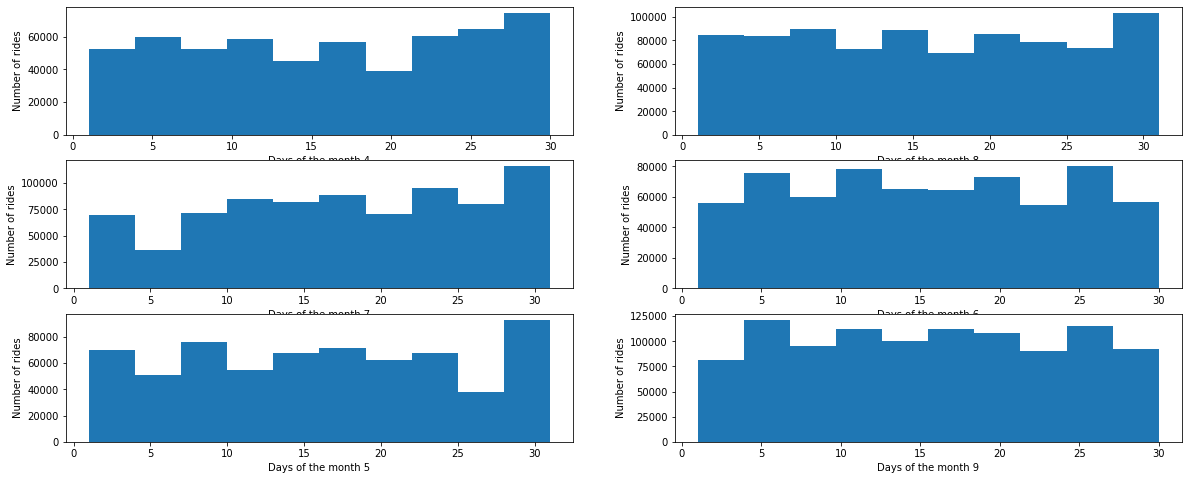

In [30]:
# Rides for days in each month
plt.figure(figsize=(20,8))

for i, month in enumerate(df['month'].unique(), 1):
    plt.subplot(3, 2, i)
    df_out = df[df['month'] == month]
    plt.hist(df_out['day'])
    plt.xlabel('Days of the month {}'.format(month))
    plt.ylabel('Number of rides')

<AxesSubplot:title={'center':'Relation between latitude of passenger and hours of the day'}, xlabel='hour', ylabel='Lat'>

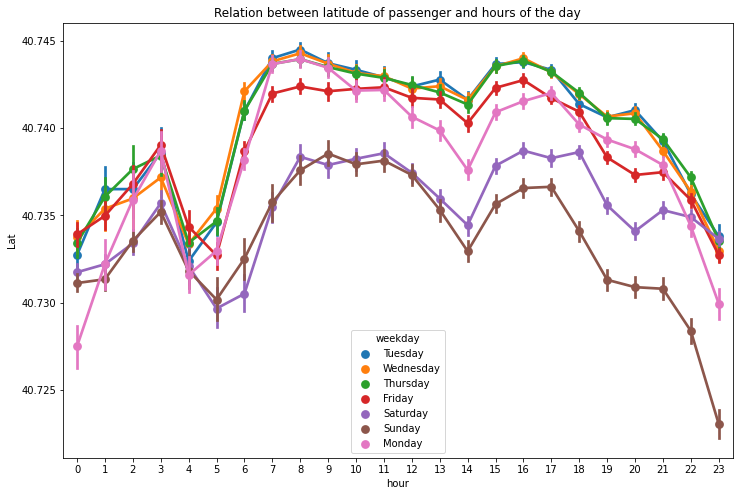

In [57]:
plt.figure(figsize=(12,8))
plt.title('Relation between latitude of passenger and hours of the day')
sns.pointplot(x='hour', y='Lat', data=df, hue='weekday')

In [36]:
# Analysis of base number get popular by month
base = df.groupby(['Base', 'month'])['Date/Time'].count().reset_index()
base.head()

Base  month  Date/Time
0  B02512      4      35536
1  B02512      5      36765
2  B02512      6      32509
3  B02512      7      35021
4  B02512      8      31472

<AxesSubplot:xlabel='month', ylabel='Date/Time'>

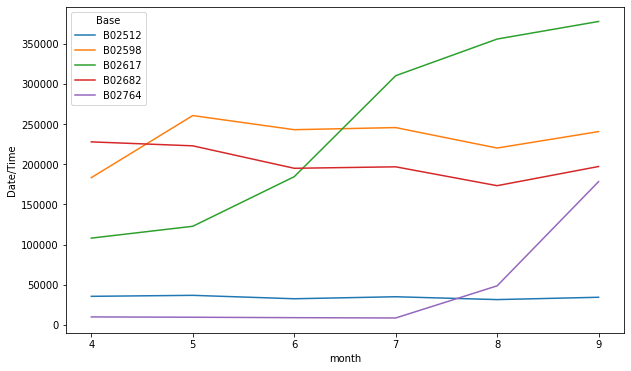

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(x= 'month', y= 'Date/Time', hue='Base', data = base)

In [38]:
# Heat maps
def count_rows(rows):
    return len(rows)

In [39]:
cross = df.groupby(['weekday', 'hour']).apply(count_rows)
cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [40]:
pivot = cross.unstack()
pivot

hour          0      1      2      3     4      5      6      7      8   \
weekday                                                                   
Friday     13716   8163   5350   6930  8806  13450  23412  32061  31509   
Monday      6436   3737   2938   6232  9640  15032  23746  31159  29265   
Saturday   27633  19189  12710   9542  6846   7084   8579  11014  14411   
Sunday     32877  23015  15436  10597  6374   6169   6596   8728  12128   
Thursday    9293   5290   3719   5637  8505  14169  27065  37038  35431   
Tuesday     6237   3509   2571   4494  7548  14241  26872  36599  33934   
Wednesday   7644   4324   3141   4855  7511  13794  26943  36495  33826   

hour          9   ...     14     15     16     17     18     19     20     21  \
weekday           ...                                                           
Friday     25230  ...  36206  43673  48169  51961  54762  49595  43542  48323   
Monday     22197  ...  28157  32744  38770  42023  37000  34159  32849  28925   
Saturday   17669  ...  31418  38769  43512  42844  45883  41098  38714  43826   
Sunday     16401  ...  28151  31112  33038  31521  28291  25948  25076  23967   
Thursday   27812  ...  36699  44442  50560  56704  55825  51907  51990  51953   
Tuesday    25023  ...  34846  41338  48667  55500  50186  44789  44661  39913   
Wednesday  25635  ...  35148  43388  50684  55637  52732  47017  47772  44553   

hour          22     23  
weekday                  
Friday     49409  41260  
Monday     20158  11811  
Saturday   47951  43174  
Sunday     19566  12166  
Thursday   44194  27764  
Tuesday    27712  14869  
Wednesday  32868  18146  

[7 rows x 24 columns]

<AxesSubplot:xlabel='hour', ylabel='weekday'>

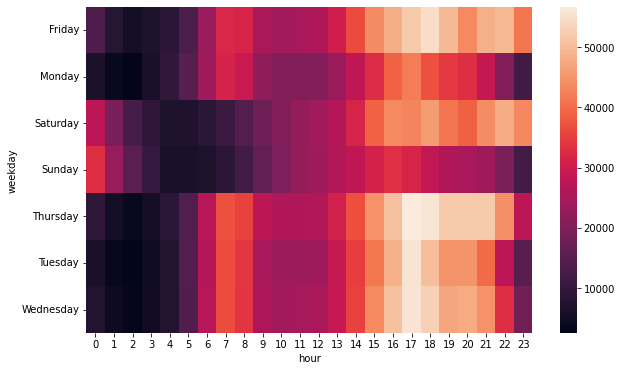

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot)

(40.6, 41.0)

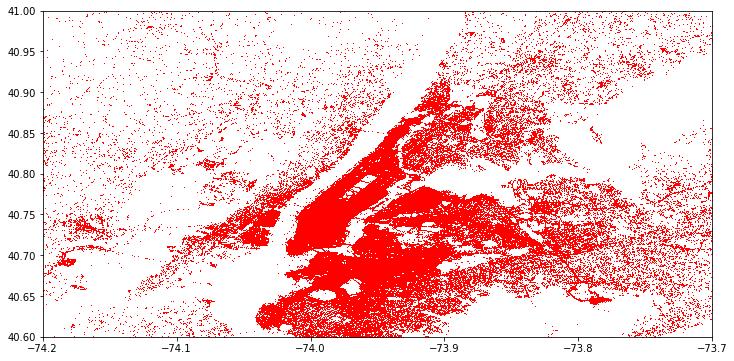

In [42]:
# Location data
plt.figure(figsize=(12,6))
plt.plot(df['Lon'], df['Lat'], 'r+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6, 41)

In [55]:
day = 'Sunday'
basemap = folium.Map()
df_out = df[df['weekday'] == day]
HeatMap(df_out.groupby(['Lat', 'Lon'])['weekday'].count().reset_index(), zoom = 30, radius=15).add_to(basemap)
basemap

In [45]:
df_out = df[df['weekday'] == 'Sunday']
spatial = df_out.groupby(['Lat', 'Lon'])['weekday'].count().reset_index()
spatial.rename(columns={'weekday': 'Number of trips in {}'.format(day)}, inplace= True)
spatial

Lat      Lon  Number of trips in Sunday
0       39.9374 -74.0722                          1
1       39.9378 -74.0721                          1
2       39.9384 -74.0742                          1
3       39.9385 -74.0734                          1
4       39.9415 -74.0736                          1
...         ...      ...                        ...
209225  41.3141 -74.1249                          1
209226  41.3180 -74.1298                          1
209227  41.3195 -73.6905                          1
209228  41.3197 -73.6903                          1
209229  42.1166 -72.0666                          1

[209230 rows x 3 columns]

In [58]:
# Other data
path = r'C:\Users\JesusSanchez\DataspellProjects\Data-Science---Projects\Uber_Data_Analysis\uber-pickups-in-new-york-city\uber-raw-data-janjune-15.csv'
df_15 = pd.read_csv(path, encoding='utf-8')
df_15.head()

Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90

In [ ]:
df_15['Pickup_date'] = pd.to_datetime(df_15['Pickup_date'], format = '%Y/%m/%d %H:%M:%S')
print(df_15.head())
df_15.dtypes

In [66]:
# More detail data
df_15['weekday'] = df_15['Pickup_date'].dt.day_name()
df_15['weekday'] = df_15['weekday'].apply(str)
df_15['day'] = df_15['Pickup_date'].dt.day
df_15['minute'] = df_15['Pickup_date'].dt.minute
df_15['month'] = df_15['Pickup_date'].dt.month
df_15['hour'] = df_15['Pickup_date'].dt.hour
df_15.head()

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID  \
0               B02617 2015-05-17 09:47:00              B02617         141   
1               B02617 2015-05-17 09:47:00              B02617          65   
2               B02617 2015-05-17 09:47:00              B02617         100   
3               B02617 2015-05-17 09:47:00              B02774          80   
4               B02617 2015-05-17 09:47:00              B02617          90   

  weekday  day  minute  month  hour  
0  Sunday   17      47      5     9  
1  Sunday   17      47      5     9  
2  Sunday   17      47      5     9  
3  Sunday   17      47      5     9  
4  Sunday   17      47      5     9

In [68]:
data = df_15.groupby(['weekday', 'hour'])['Pickup_date'].count().reset_index()
data.columns=['weekday', 'hour', 'trips']
data.head()

weekday  hour  trips
0  Friday     0  85939
1  Friday     1  46616
2  Friday     2  28102
3  Friday     3  19518
4  Friday     4  23575

<AxesSubplot:title={'center':'Number of trips for hour in each weekday'}, xlabel='hour', ylabel='trips'>

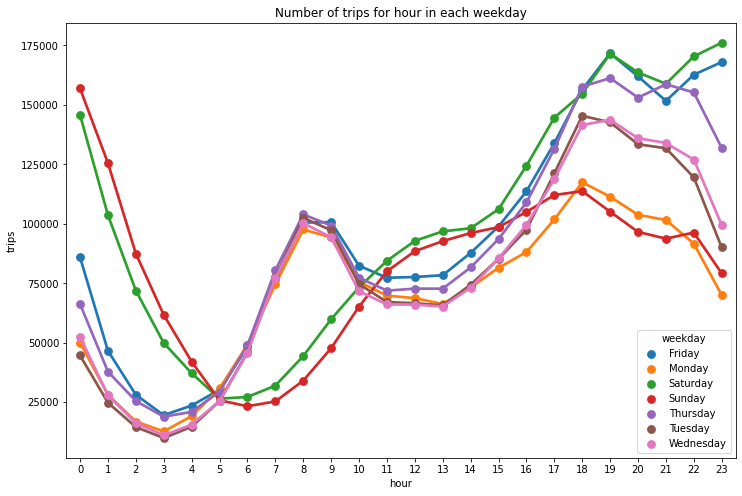

In [75]:
plt.figure(figsize=(12,8))
plt.title('Number of trips for hour in each weekday')
sns.pointplot(x='hour', y='trips', hue='weekday', data= data)

In [78]:
path = r'C:\Users\JesusSanchez\DataspellProjects\Data-Science---Projects\Uber_Data_Analysis\uber-pickups-in-new-york-city\Uber-Jan-Feb-FOIL.csv'
df_foil = pd.read_csv(path, encoding='utf-8')
df_foil.head()

dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537

<AxesSubplot:title={'center':'Distribution of trips for each base_number'}, xlabel='dispatching_base_number', ylabel='trips'>

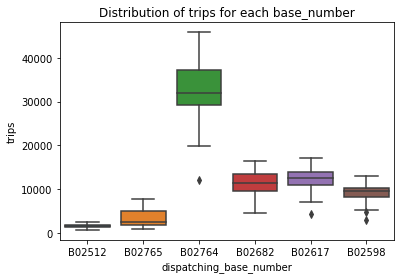

In [80]:
plt.title('Distribution of trips for each base_number')
sns.boxplot(x='dispatching_base_number', y='trips', data=df_foil)

In [81]:
df_foil['trips/vehicle'] = df_foil['trips']/df_foil['active_vehicles']
df_foil.head()

dispatching_base_number      date  active_vehicles  trips  trips/vehicle
0                  B02512  1/1/2015              190   1132       5.957895
1                  B02765  1/1/2015              225   1765       7.844444
2                  B02764  1/1/2015             3427  29421       8.585060
3                  B02682  1/1/2015              945   7679       8.125926
4                  B02617  1/1/2015             1228   9537       7.766287

Text(0, 0.5, 'Trips per vehicle')

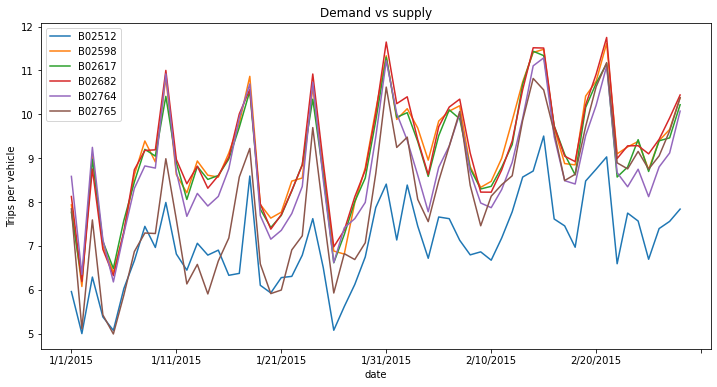

In [85]:
plt.figure(figsize=(12,6))
df_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicle'].plot()
plt.title('Demand vs supply')
plt.legend()
plt.ylabel('Trips per vehicle')